<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#逻辑回归" data-toc-modified-id="逻辑回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>逻辑回归</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#Neural-network-without-regularisation" data-toc-modified-id="Neural-network-without-regularisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neural network without regularisation</a></span></li></ul></div>

In [1]:
import numpy as np

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
# number of samples in the data set
N_SAMPLES = 2000
# ratio between training and test sets
TEST_SIZE = 0.2
# boundary of the graph
GRID_PADDING = 0.5   ##  边框
GRID_STEP = 0.01    ## 网格 大小
# number of iterations of the neural network
N_EPOCHS = 200

In [3]:
#  产生半圆形的数据集
X, y = make_moons(n_samples = N_SAMPLES, noise=0.4, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=42)

In [4]:
# 生成网格
x_min, x_max = X[:, 0].min() - GRID_PADDING, X[:, 0].max() + GRID_PADDING  # 横坐标 + 边缘扩张
y_min, y_max = X[:, 1].min() - GRID_PADDING, X[:, 1].max() + GRID_PADDING #  纵坐标 + 边缘扩张
XX, YY = np.meshgrid(np.arange(x_min, x_max, GRID_STEP), np.arange(y_min, y_max, GRID_STEP))


In [5]:
# 辅助绘图函数
def make_plot(X, y, XX, YY, preds, plot_name, file_name):
    plt.figure(figsize=(10,10))
    axes = plt.gca()
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([y_min,y_max])
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=20)
    plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 0.6, cmap=cm.Spectral)
    plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    plt.savefig(file_name)
    # plt.close()

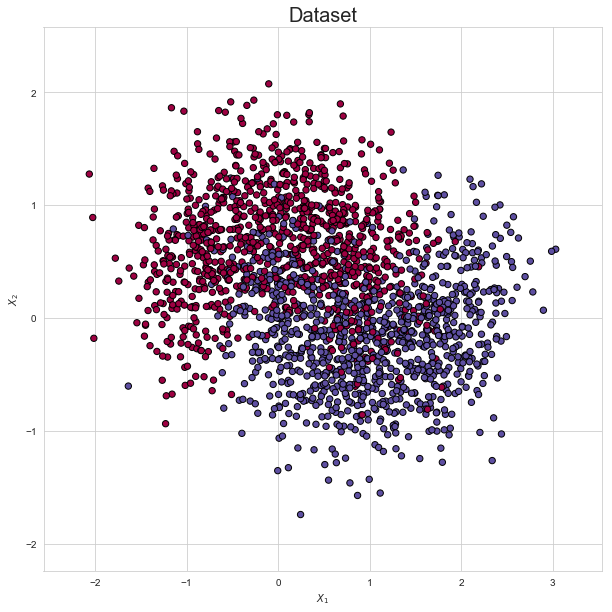

In [6]:
# 数据集可视化
plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_xlim([x_min,x_max])
axes.set_ylim([y_min,y_max])
axes.set(xlabel="$X_1$", ylabel="$X_2$")
plt.title("Dataset", fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black');
plt.savefig("dataset.png")

# 逻辑回归

In [7]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_train_pred_1 = regressor.predict(X_train)
y_test_pred_1 = regressor.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred_1)
test_acc = accuracy_score(y_test, y_test_pred_1)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.829375
Test accuracy: 0.85


/Users/liuchuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Train

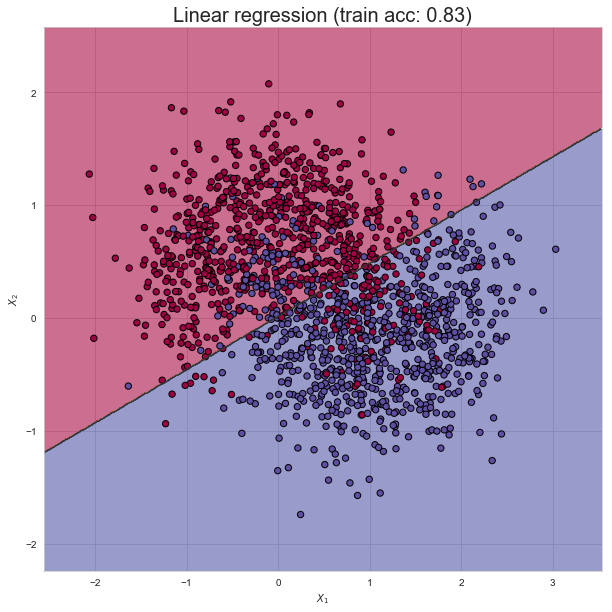

In [8]:
preds = regressor.predict(np.c_[XX.ravel(), YY.ravel()])

# ravel  将多维数组 转换成1维
# np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
# np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。

title = "Linear regression (train acc: {0:.2f})".format(train_acc)
file = "linear_regression_train.png"
make_plot(X_train, y_train, XX, YY, preds, title, file)

## Test

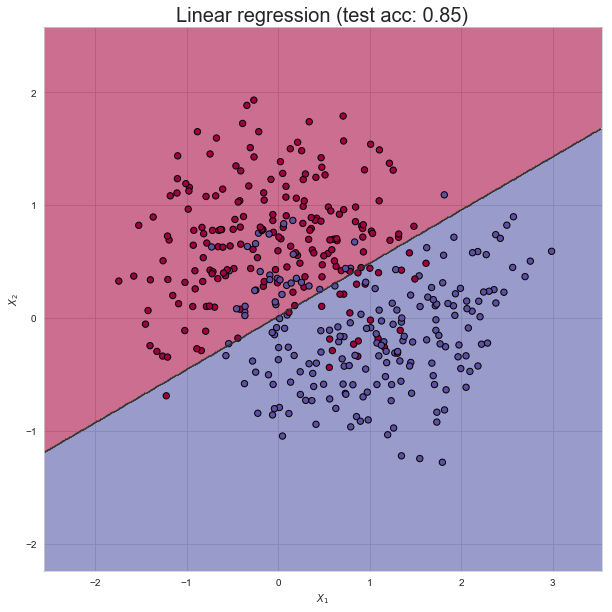

In [9]:
preds = regressor.predict(np.c_[XX.ravel(), YY.ravel()])
title = "Linear regression (test acc: {0:.2f})".format(test_acc)
file = "linear_regression_test.png"
make_plot(X_test, y_test, XX, YY, preds, title, file)

# Neural network without regularisation

In [10]:
model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)

In [11]:
y_train_pred_2 = model.predict_classes(X_train)
y_test_pred_2 = model.predict_classes(X_test)
train_acc = accuracy_score(y_train, y_train_pred_2)
test_acc = accuracy_score(y_test, y_test_pred_2)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.885
Test accuracy: 0.865


In [ ]:
model_json = model.to_json()
with open("nn_reg_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("nn_reg_model.h5")
print("Saved model to disk")

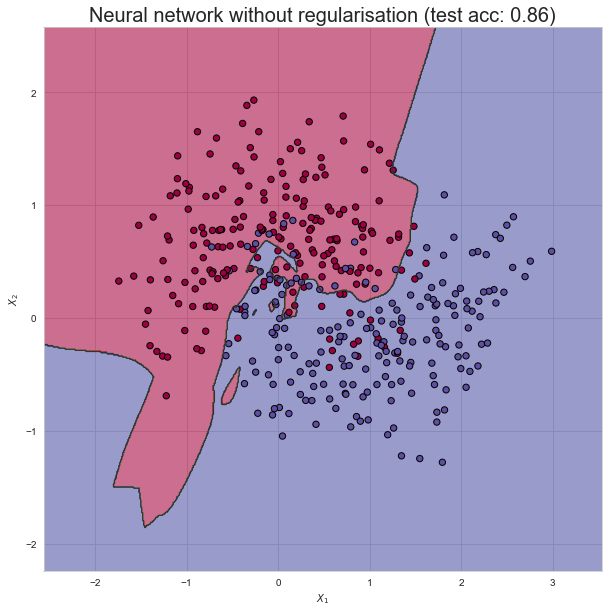

In [13]:
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
title = "Neural network without regularisation (test acc: {0:.2f})".format(test_acc)
file = "nn_test.png"
make_plot(X_test, y_test, XX, YY, preds, title, file)

In [14]:
model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)

Train accuracy: 0.86625
Test accuracy: 0.8825


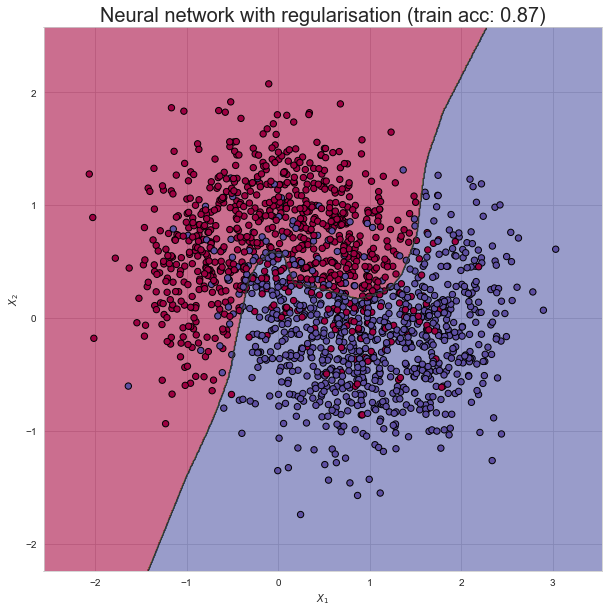

In [15]:
y_train_pred_3 = model.predict_classes(X_train)
y_test_pred_3 = model.predict_classes(X_test)
train_acc = accuracy_score(y_train, y_train_pred_3)
test_acc = accuracy_score(y_test, y_test_pred_3)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
title = "Neural network with regularisation (train acc: {0:.2f})".format(train_acc)
file = "nn_reg_train.png"
make_plot(X_train, y_train, XX, YY, preds, title, file)

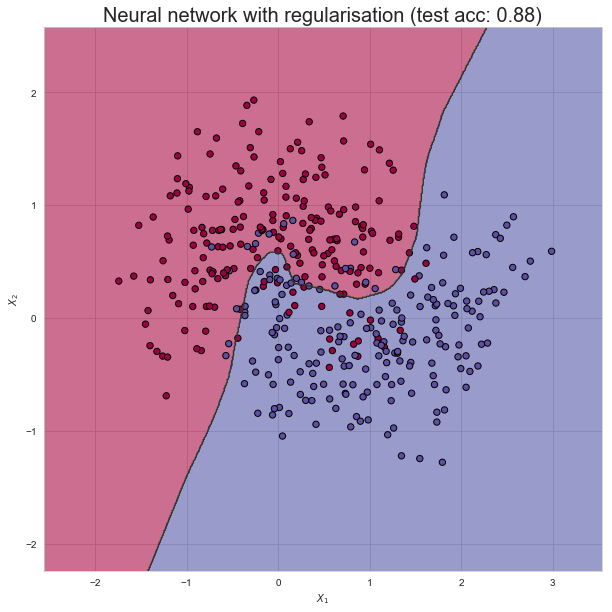

In [16]:
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
title = "Neural network with regularisation (test acc: {0:.2f})".format(test_acc)
file = "nn_reg_test.png"
make_plot(X_test, y_test, XX, YY, preds, title, file)